# Machine Learning Engineer Nanodegree
## João Pedro Megid Carrilho
## Project: Capstone Project

References: 
    https://pt.coursera.org/learn/competitive-data-science/lecture/1Nh5Q/overview /n
    http://www.codiply.com/blog/hyperparameter-grid-search-across-multiple-models-in-scikit-learn/
    https://pt.coursera.org/learn/machine-learning/lecture/RBqQl/advice-for-applying-pca

## Data Exploration
In this section we're going to load necessary libraries and analyze some major numerical and statistical characteristics of the data set:

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from time import time
import matplotlib 
import matplotlib.pyplot as plt

from IPython.display import display # Allows the use of display() for DataFrames
# Pretty display for notebooks
%matplotlib inline
# Read student data
try:    
    spotify_data = pd.read_csv("data.csv")
    
    print "Spotify data read successfully!"
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Spotify data read successfully!


In [2]:
# Number of samples (songs):
n_songs = len(spotify_data)

# Number of features (number of columns in the dataset less the target label column):
n_features = len(spotify_data.columns) - 1

# Number of songs liked:
n_liked = len(spotify_data[spotify_data['target'] == 1])

# Calculate failing students:
n_disliked = len(spotify_data[spotify_data['target'] == 0])

# Like rate:
like_rate = float(n_liked * 100.0 / n_songs)

# Result:
print "Total number of songs: {}".format(n_songs)
print "Number of features: {}".format(n_features)
print "Number of songs liked: {}".format(n_liked)
print "Number of songs disliked: {}".format(n_disliked)
print "Like rate of songs: {:.2f}%".format(like_rate)
# Display a description of the dataset
display(spotify_data.describe(percentiles=[]))

Total number of songs: 2017
Number of features: 16
Number of songs liked: 1020
Number of songs disliked: 997
Like rate of songs: 50.57%


,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [3]:
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
Unnamed: 0          2017 non-null int64
acousticness        2017 non-null float64
danceability        2017 non-null float64
duration_ms         2017 non-null int64
energy              2017 non-null float64
instrumentalness    2017 non-null float64
key                 2017 non-null int64
liveness            2017 non-null float64
loudness            2017 non-null float64
mode                2017 non-null int64
speechiness         2017 non-null float64
tempo               2017 non-null float64
time_signature      2017 non-null float64
valence             2017 non-null float64
target              2017 non-null int64
song_title          2017 non-null object
artist              2017 non-null object
dtypes: float64(10), int64(5), object(2)
memory usage: 268.0+ KB


In [4]:
## Removing not analyzed features:
spotify_data.drop(['Unnamed: 0','song_title','artist'], axis = 1, inplace = True)

### Exploratory Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C2D7080>,
      dtype=object)

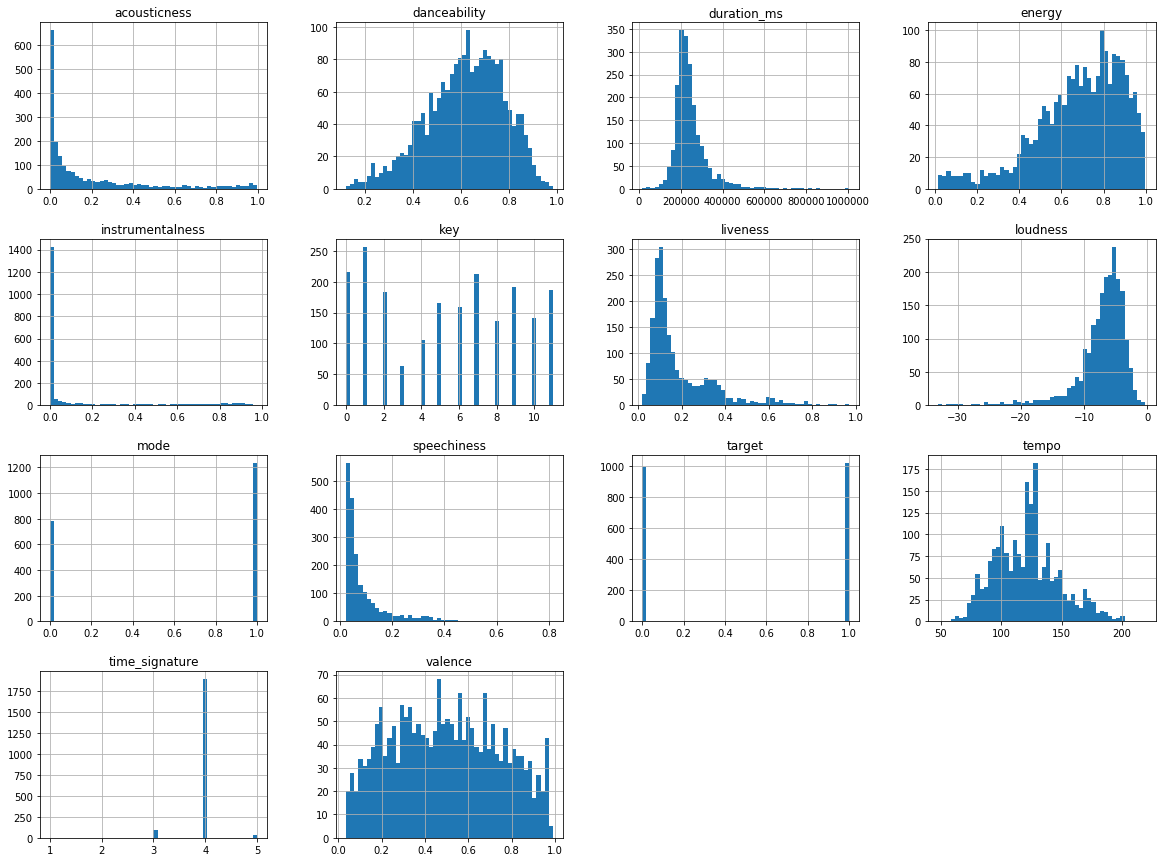

In [5]:
#plotting Histogram
spotify_data.hist(bins=50, figsize=(20,15))

# Preparing the Data
In this section, the data will be prepared for our model's training and testing.

In [6]:
# Extract feature columns
feature_cols = list(spotify_data.columns[:-1])

# Extract target column 'passed'
target_col = spotify_data.columns[-1] 

# Show the list of columns
print "Feature columns:\n{}".format(feature_cols)
print "\nTarget column: {}".format(target_col)

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = spotify_data[feature_cols]
y_all = spotify_data[target_col]

# Show the feature information by printing the first five rows
print "\nFeature values:"
print X_all.head()

Feature columns:
['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence']

Target column: target

Feature values:
   acousticness  danceability  duration_ms  energy  instrumentalness  key  \
0        0.0102         0.833       204600   0.434          0.021900    2   
1        0.1990         0.743       326933   0.359          0.006110    1   
2        0.0344         0.838       185707   0.412          0.000234    2   
3        0.6040         0.494       199413   0.338          0.510000    5   
4        0.1800         0.678       392893   0.561          0.512000    5   

   liveness  loudness  mode  speechiness    tempo  time_signature  valence  
0    0.1650    -8.795     1       0.4310  150.062             4.0    0.286  
1    0.1370   -10.401     1       0.0794  160.083             4.0    0.588  
2    0.1590    -7.148     1       0.2890   75.044             4.0    0.173  
3 

### Train Test split

In [7]:
from sklearn.model_selection import train_test_split

# Set the number of training points
num_train = int(0.8*len(spotify_data))

# Set the number of testing points
num_test = X_all.shape[0] - num_train
 
# Shuffle and split the dataset into the number of training and testing points above
X_train, X_test, y_train, y_test = train_test_split(X_all,y_all,train_size = num_train, random_state = 42, stratify = y_all)
# Show the results of the split
print "Training set has {} samples.".format(X_train.shape)
print "Testing set has {} samples.".format(X_test.shape)

Training set has (1613, 13) samples.
Testing set has (404, 13) samples.


C:\Users\Carrilho\AppData\Local\conda\conda\envs\Python27\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


### Implementation: Feature Scaling

In [8]:
# Import, fit and transform data:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
scaled_data = X_train.copy()
scaled_data = pd.DataFrame(scaler.transform(scaled_data), columns = feature_cols)
scaled_data.describe(percentiles=[])

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,1.613000e+03,1.613000e+03,1.613000e+03,1.613000e+03,1.613000e+03,1.613000e+03,1.613000e+03,1.613000e+03,1.613000e+03,1.613000e+03,1.613000e+03,1.613000e+03,1.613000e+03
mean,5.396248e-17,3.535093e-16,-1.508747e-16,-2.907366e-16,-5.451312e-17,7.708926e-17,-2.863315e-17,-9.801349e-17,-1.101275e-17,2.114448e-16,-1.734508e-16,8.413742e-16,-2.587997e-17
std,1.000310e+00,1.000310e+00,1.000310e+00,1.000310e+00,1.000310e+00,1.000310e+00,1.000310e+00,1.000310e+00,1.000310e+00,1.000310e+00,1.000310e+00,1.000310e+00,1.000310e+00
min,-7.136546e-01,-3.031191e+00,-2.836847e+00,-3.213850e+00,-4.919547e-01,-1.470138e+00,-1.119744e+00,-6.503653e+00,-1.265548e+00,-7.703083e-01,-2.791686e+00,-1.194908e+01,-1.839364e+00
50%,-4.857320e-01,6.300931e-02,-2.116031e-01,1.661881e-01,-4.916678e-01,1.835110e-01,-4.183277e-01,2.118844e-01,7.901712e-01,-4.145122e-01,-2.874897e-04,1.021076e-01,-2.080835e-02
max,3.143374e+00,2.177174e+00,9.313437e+00,1.500161e+00,3.075707e+00,1.561552e+00,4.928222e+00,1.671226e+00,7.901712e-01,8.101100e+00,3.664560e+00,4.119172e+00,2.018618e+00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000010E99080>,
      dtype=object)

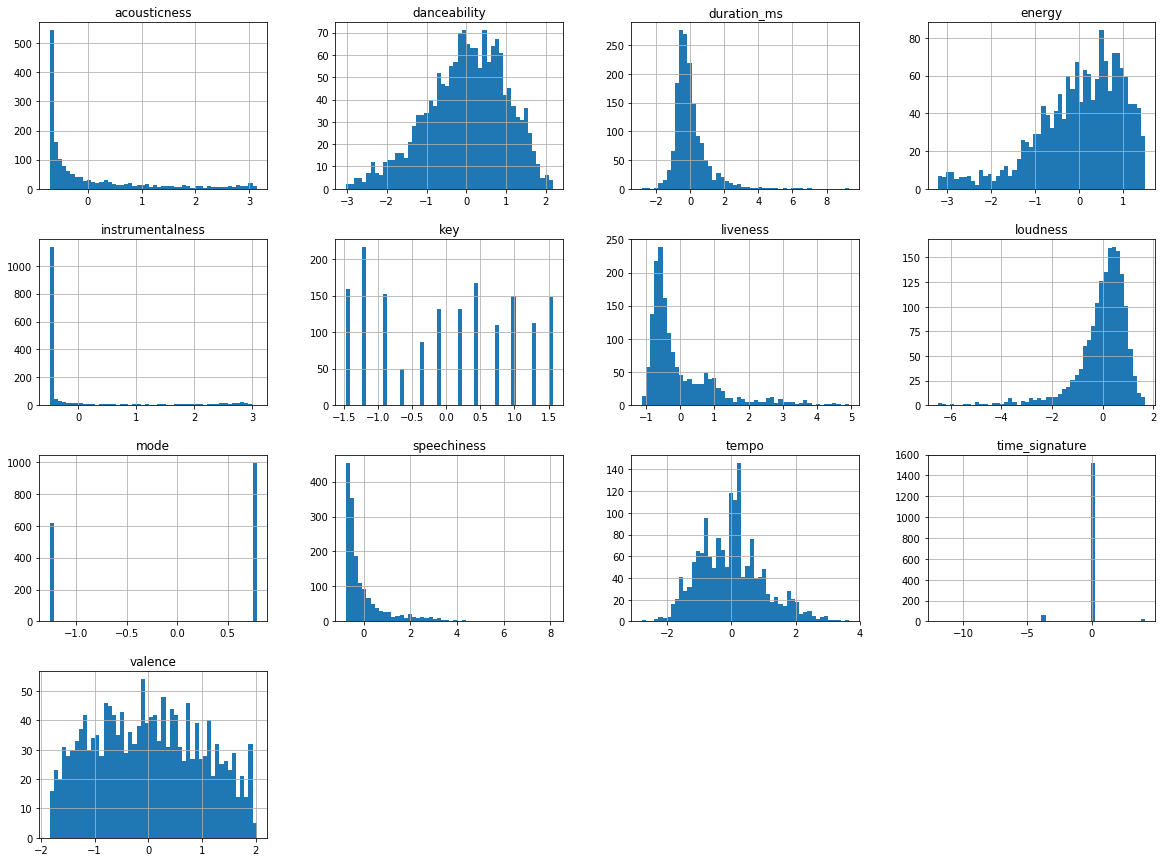

In [9]:
#Analyzing resulting deistribution:
scaled_data.hist(bins=50, figsize=(20,15))

### Feature relevance

In [10]:
#Generating Correlation Matrix and deploying results with 'target label':
copy_data = scaled_data.copy()
copy_data.insert(loc =13, column='target',value=y_train)
corr_matrix = copy_data.corr()
corr_matrix["target"].sort_values(ascending = False)

target              1.000000
speechiness         0.036860
acousticness        0.030874
duration_ms         0.017278
loudness            0.014790
valence             0.012553
instrumentalness    0.010685
tempo               0.008538
danceability        0.005346
energy              0.003407
time_signature     -0.000392
liveness           -0.018815
key                -0.026790
mode               -0.051250
Name: target, dtype: float64

# Training and evaluating models

In [11]:
from sklearn.metrics import accuracy_score

def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Train the classifier
    
    clf.fit(X_train, y_train)
    
    
    # Print the results
    

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on accuracy score. '''
    
    # Make predictions

    y_pred = clf.predict(features)

    
    # Print and return results
    return accuracy_score(target.values, y_pred)


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on accuracy score. '''
    
    # Indicate the classifier and the training set size
    print "Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    print "Accuracy score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train))
    print "Accuracy score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test))

In [12]:
from sklearn.svm import SVC,LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

# Initialize models
clf_A = SVC()
clf_B = LinearSVC()
clf_C = AdaBoostClassifier(RandomForestClassifier(), random_state = 11)
clf_D = KNeighborsClassifier()
classif = [clf_A,clf_B,clf_C,clf_D]

#Adjusting test set
scaled_test = pd.DataFrame(scaler.transform(X_test), columns = feature_cols)

# Execute the 'train_predict' function for each classifier and each training set size

for clf in classif:    
    for size in [500, 1000, len(scaled_data)]:
        train_predict(clf, scaled_data[:size], y_train[:size], scaled_test, y_test)

Training a SVC using a training set size of 500. . .
Accuracy score for training set: 0.8020.
Accuracy score for test set: 0.7327.
Training a SVC using a training set size of 1000. . .
Accuracy score for training set: 0.8090.
Accuracy score for test set: 0.7525.
Training a SVC using a training set size of 1613. . .
Accuracy score for training set: 0.8022.
Accuracy score for test set: 0.7723.
Training a LinearSVC using a training set size of 500. . .
Accuracy score for training set: 0.6520.
Accuracy score for test set: 0.6733.
Training a LinearSVC using a training set size of 1000. . .
Accuracy score for training set: 0.6710.
Accuracy score for test set: 0.6807.
Training a LinearSVC using a training set size of 1613. . .
Accuracy score for training set: 0.6671.
Accuracy score for test set: 0.6856.
Training a AdaBoostClassifier using a training set size of 500. . .
Accuracy score for training set: 1.0000.
Accuracy score for test set: 0.7054.
Training a AdaBoostClassifier using a training

### SVC and AdaBoostClassifier refinement  

In [13]:
#SVC Grid Search
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer


parameters =   {'C':[1.5, 1.6, 1.7], 'kernel': ['rbf'], 'gamma': [0.1] }


#Initialize the classifier
clf_1 = SVC()
# Make an f1 scoring function using 'make_scorer' 
acc_scorer = make_scorer(accuracy_score)

# Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(clf_1,parameters,acc_scorer,n_jobs=-1)

# Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(scaled_data,y_train)

# Get the estimator
clf_1 = grid_obj.best_estimator_

# Report the final F1 score for training and testing after parameter tuning
print "Tuned model has a training accuracy score of {:.4f}.".format(predict_labels(clf_1, scaled_data, y_train))
print "Tuned model has a testing accuracy score of {:.4f}.".format(predict_labels(clf_1, scaled_test, y_test))




Tuned model has a training accuracy score of 0.8469.
Tuned model has a testing accuracy score of 0.7797.


In [14]:
clf_1.get_params()

{'C': 1.7,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 0.1,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [15]:
#AdaBoost Grid Search
from sklearn.tree import DecisionTreeClassifier
parameters = { 'base_estimator' : [ RandomForestClassifier(max_depth = 3), DecisionTreeClassifier() ], 'n_estimators':  [30,50,70], 'learning_rate':  [0.5,1,1.5] }




#Initialize the classifier
clf_2 = AdaBoostClassifier(random_state = 11)
# Make an f1 scoring function using 'make_scorer' 
acc_scorer = make_scorer(accuracy_score)

# Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(clf_2,parameters,acc_scorer,n_jobs=-1)

# Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(scaled_data,y_train)

# Get the estimator
clf_2 = grid_obj.best_estimator_

# Report the final F1 score for training and testing after parameter tuning
print "Tuned model has a training accuracy score of {:.4f}.".format(predict_labels(clf_2, scaled_data, y_train))
print "Tuned model has a testing accuracy score of {:.4f}.".format(predict_labels(clf_2, scaled_test, y_test))


Tuned model has a training accuracy score of 0.9169.
Tuned model has a testing accuracy score of 0.7723.


In [16]:
clf_2.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=3, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
             oob_score=False, random_state=None, verbose=0,
             warm_start=False),
 'base_estimator__bootstrap': True,
 'base_estimator__class_weight': None,
 'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': 3,
 'base_estimator__max_features': 'auto',
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_impurity_split': None,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__n_estimators': 10,
 'base_estimator__n_jobs': 1,
 'base_estima

### Confusion Matrix analysis

In [17]:
from sklearn.metrics import confusion_matrix
y_test_s = clf_1.predict(scaled_test)
y_test_a = clf_2.predict(scaled_test)
print("Confusion matrix for SVM: ")
print(confusion_matrix(y_test,y_test_s))
print("Confusion matrix for ABC: ")
print(confusion_matrix(y_test, y_test_a))

Confusion matrix for SVM: 
[[161  39]
 [ 50 154]]
Confusion matrix for ABC: 
[[155  45]
 [ 47 157]]


#### Plotting Precision Recall:

In [18]:
from sklearn.metrics import precision_recall_curve
y_scores_s = clf_1.decision_function(scaled_data)
y_scores_a = clf_2.decision_function(scaled_data)

precisions_s, recalls_s, thresholds_s = precision_recall_curve(y_train, y_scores_s)
precisions_a, recalls_a, thresholds_a = precision_recall_curve(y_train, y_scores_a)


In [19]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

    

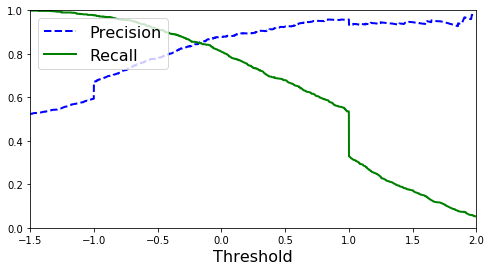

In [20]:
plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions_s, recalls_s, thresholds_s)
plt.xlim([-1.5, 2])
plt.show()


#### ROC Curve Analysis

In [21]:
from sklearn.metrics import roc_curve
y_scores_1 = clf_1.decision_function(scaled_test)
y_scores_2 = clf_2.decision_function(scaled_test)
fpr_1, tpr_1, thresholds_1 = roc_curve(y_test, y_scores_1)
fpr_2, tpr_2, thresholds_2 = roc_curve(y_test, y_scores_2)

In [22]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)


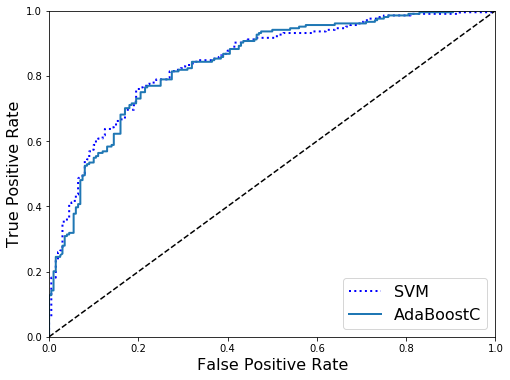

In [23]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_1, tpr_1, "b:", linewidth=2, label="SVM")
plot_roc_curve(fpr_2, tpr_2, "AdaBoostC")
plt.legend(loc="lower right", fontsize=16)
plt.show()

### K Fold Cross Validation

In [39]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 6, shuffle = True)
k_set = scaler.transform(X_all)
for train_index , test_index in kf.split(k_set):
    clf_1.fit(k_set[train_index],y_all[train_index])
    k_pred = clf_1.predict(k_set[test_index])
    print("K-FOLD TEST SCORE:", accuracy_score(k_pred,y_all[test_index]))


('K-FOLD TEST SCORE:', 0.7388724035608308)
('K-FOLD TEST SCORE:', 0.7589285714285714)
('K-FOLD TEST SCORE:', 0.7410714285714286)
('K-FOLD TEST SCORE:', 0.7380952380952381)
('K-FOLD TEST SCORE:', 0.7916666666666666)
('K-FOLD TEST SCORE:', 0.7619047619047619)
